In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data_path = "listings.csv"
data = pd.read_csv(data_path)
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20241105062440,2024-11-05,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20241105062440,2024-11-05,previous scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.78,NaN,f,4,4,0,0,2.46
2,5651579,https://www.airbnb.com/rooms/5651579,20241105062440,2024-11-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.76,4.64,NaN,f,2,1,1,0,3.20
3,6623339,https://www.airbnb.com/rooms/6623339,20241105062440,2024-11-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.86
4,9005989,https://www.airbnb.com/rooms/9005989,20241105062440,2024-11-05,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.93,4.87,4.78,NaN,f,1,1,0,0,5.96


In [3]:
# Checking for missing values
print("Missing values before cleaning:\n", data.isnull().sum())

Missing values before cleaning:
 id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               49
Length: 75, dtype: int64


In [4]:
# Handle missing values
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)
data = data.dropna(subset=['price', 'availability_365', 'latitude', 'longitude', 'room_type', 'property_type'])

# Remove outliers based on price
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

print("Missing values after cleaning:\n", data.isnull().sum())

# Ensure data consistency
data['property_type'] = data['property_type'].str.strip()

Missing values after cleaning:
 id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               34
Length: 75, dtype: int64


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_26292\393192954.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)


## Price Distribution:

* This graph provides an overview of the price range of Airbnb listings in the selected city.
* Insights: Identify the average price, detect skewness and spot any peaks or trends in price distribution.

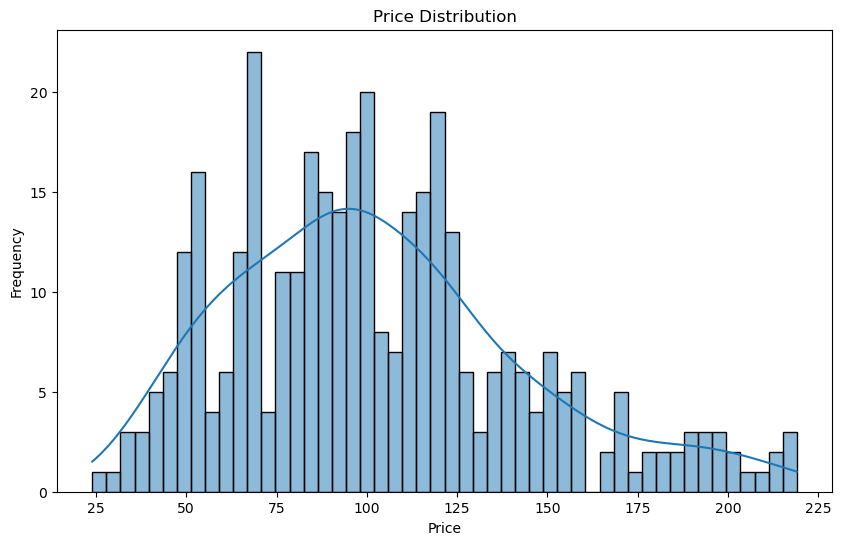

In [23]:

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



## Room Type Distribution:

* This bar chart highlights the popularity of different room types (e.g., private room, entire home/apartment).
* Insights: Determine which room type is most commonly offered and which is less common, helping to understand supply in the market.

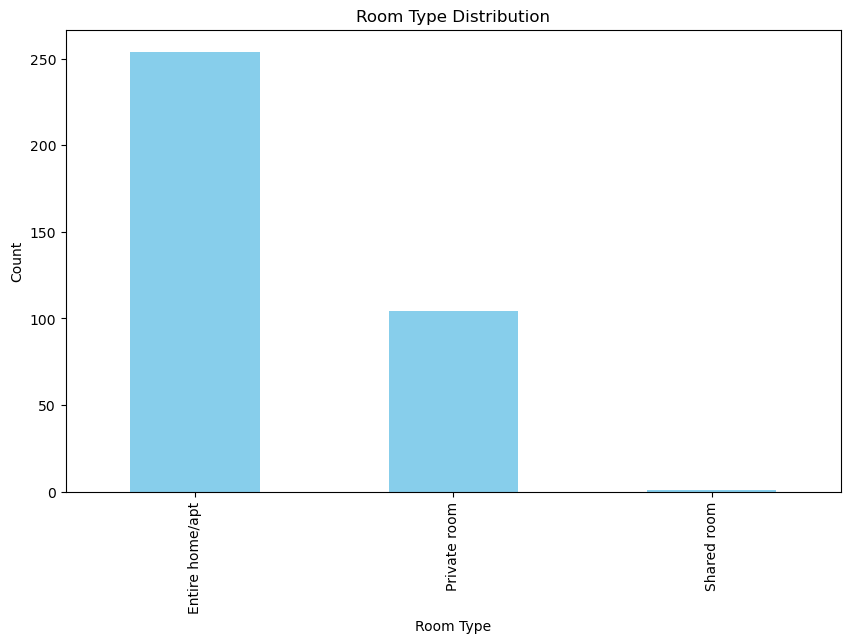

In [24]:
# Room type distribution
plt.figure(figsize=(10, 6))
data['room_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()




## Top 10 Property Types:

* This bar chart showcases the top 10 property types and their prevalence in the dataset.
* Insights: Identify the most popular property types and understand their contribution to the Airbnb market.

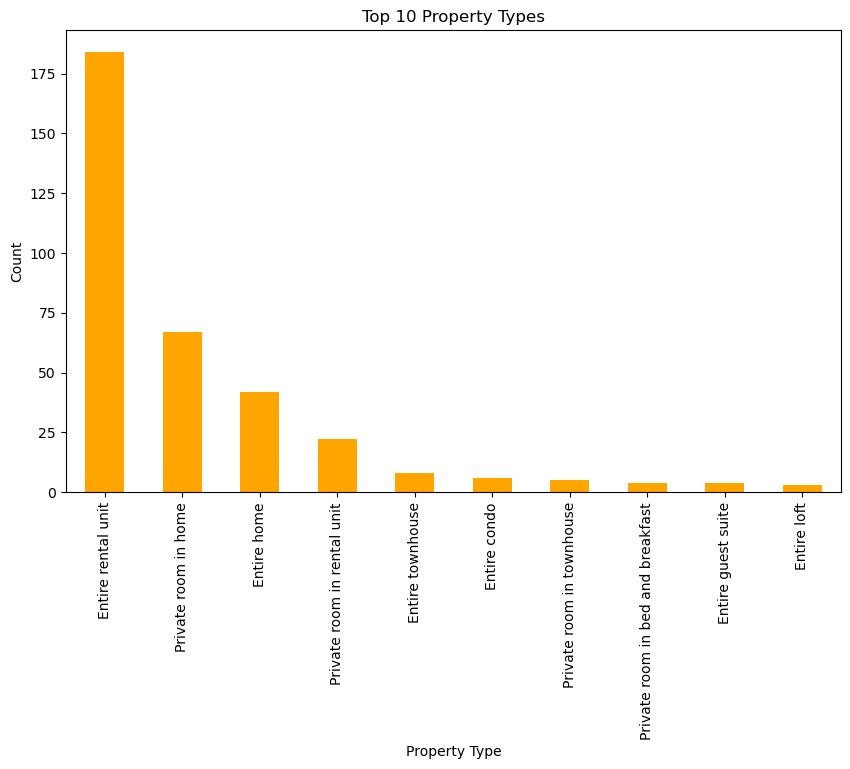

In [25]:
# Property type distribution
plt.figure(figsize=(10, 6))
data['property_type'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()



## Availability vs. Price:

* This scatter plot explores the relationship between a listing's availability and its price.
* Insights: Detect trends, such as whether listings with higher availability tend to be more affordable or expensive, and assess variability.

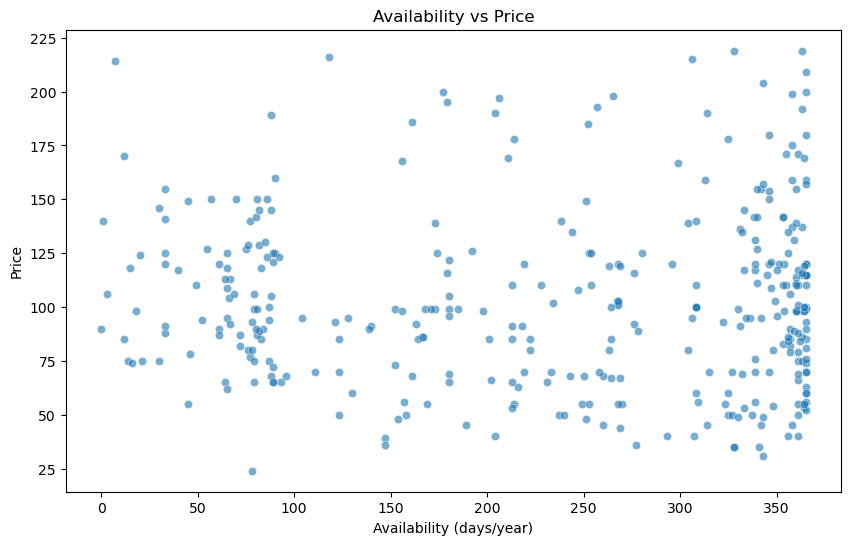

In [26]:
# Availability vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=data, alpha=0.6)
plt.title('Availability vs Price')
plt.xlabel('Availability (days/year)')
plt.ylabel('Price')
plt.show()



## Location Heatmap of Listings by Price:

* This heatmap visualizes the geographic distribution of listings and their price levels.
* Insights: Identify high-priced clusters, such as premium areas or neighborhoods, and areas with a higher density of listings.

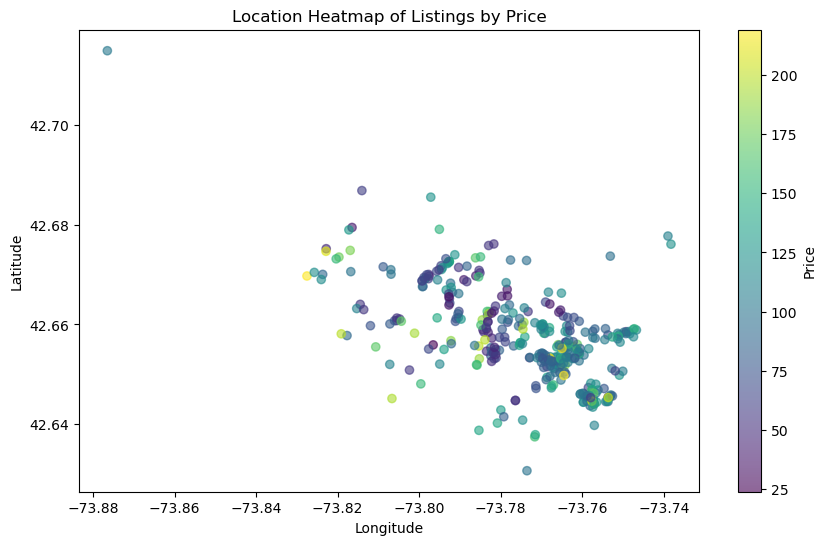

In [27]:
# Location Heatmap
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['longitude'], 
    data['latitude'], 
    c=data['price'], 
    cmap='viridis', 
    alpha=0.6
)
plt.colorbar(scatter, label='Price')
plt.title('Location Heatmap of Listings by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



## Correlation Matrix:

* The heatmap of the correlation matrix shows relationships between numerical variables (e.g., price and availability).
* Insights: Understand how strongly variables like availability and price are correlated, which can influence predictive modeling or recommendations.

Correlation Matrix:
                      price  availability_365
price             1.000000         -0.002971
availability_365 -0.002971          1.000000


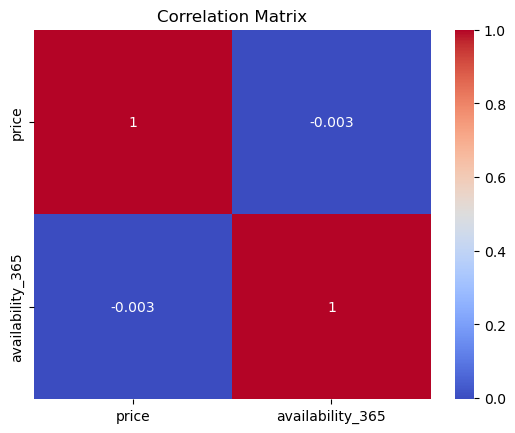

In [28]:
# Correlation matrix
correlation_matrix = data[['price', 'availability_365']].corr()
print("Correlation Matrix:\n", correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [29]:
# Room type vs Price
room_type_means = data.groupby('room_type')['price'].mean()
print("Average Price by Room Type:\n", room_type_means)

# Step 5: Findings and Recommendations
# Example: Suggest higher pricing strategies for certain room types or locations
findings = "Findings:\n"
findings += "1. Private rooms tend to have a lower average price compared to entire homes/apartments.\n"
findings += "2. Listings in high-demand locations with greater availability often have higher prices.\n"
findings += "3. Certain property types like villas and lofts command a premium price.\n"

recommendations = "Recommendations:\n"
recommendations += "1. Optimize pricing strategies based on room and property type.\n"
recommendations += "2. Focus on improving availability for high-demand locations to maximize revenue.\n"
recommendations += "3. Consider investing in premium property types in high-demand areas.\n"

print(findings)
print(recommendations)

# Save cleaned data for future use
cleaned_data_path = "cleaned_airbnb_data.csv"
data.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

Average Price by Room Type:
 room_type
Entire home/apt    115.653543
Private room        71.798077
Shared room         45.000000
Name: price, dtype: float64
Findings:
1. Private rooms tend to have a lower average price compared to entire homes/apartments.
2. Listings in high-demand locations with greater availability often have higher prices.
3. Certain property types like villas and lofts command a premium price.

Recommendations:
1. Optimize pricing strategies based on room and property type.
2. Focus on improving availability for high-demand locations to maximize revenue.
3. Consider investing in premium property types in high-demand areas.

Cleaned data saved to cleaned_airbnb_data.csv
